# **Historic Landmark Recognizer**

**Goal**

Identifying historic landmarks using an image recognizer, using 15 categories.



**Categories**

1. Tajmahal (India)
2. Christ the Redeemer (Brazil)
3. Machu Picchu (Peru)
4. Pyramid (Egypt)
5. The Great Wall (China)
6. Golden Gate Bridge (USA)
7. Roman Colosseum (Italy)
8. Eiffel Tower (France)
9. Statue of Liberty (USA)
10. Sydney Opera House (Australia)
11. Mount Rushmore (USA)
12. Leaning Tower of Pisa (Italy)
13. Salt Flats of Uyuni (Bolivia)
14. Merlion Statue (Singapore)
15. Big Ben (UK)



# **Setting up the Necessary Things**

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32
version = 1

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Combining the Images**

In [ ]:
landmark_labels = [
    "Tajmahal",
    "Christ the Redeemer",
    "Machu Picchu",
    "Pyramids of Egypt",
    "The Great Wall of China",
    "Golden Gate Bridge",
    "Roman Colosseum",
    "Eiffel Tower",
    "Statue of Liberty",
    "Sydney Opera House",
    "Mount Rushmore",
    "Leaning Tower of Pisa",
    "Salt Flats of Uyuni",
    "Merlion Statue",
    "Big Ben"
]
len(landmark_labels)

15

In [ ]:
data_path = "Data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for landmark in landmark_labels:

  dest = f"{data_path}/{landmark}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    landmark_image_urls = search_images_ddg(landmark)
    download_images(dest, urls = landmark_image_urls)

  except:
    continue

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#2708) [Path('Data/Christ the Redeemer/99c4fd5a-2dbe-4129-ad2e-b4180338ac7b.jpg'),Path('Data/Christ the Redeemer/81ccaa3c-44a4-4f47-a35c-c0660d291171.jpg'),Path('Data/Christ the Redeemer/8cab2769-64aa-49e6-bf4b-cabc1a2973fd.jpg'),Path('Data/Christ the Redeemer/ad3a204d-93e8-4145-bb62-0b6fd716ed1e.jpg'),Path('Data/Christ the Redeemer/d15f2c21-2835-4cec-984e-94501173144b.jpg'),Path('Data/Christ the Redeemer/521e16ac-e0c0-4bbe-9067-34b3bd3e0c57.jpg'),Path('Data/Christ the Redeemer/b23af1d7-48a9-4d76-9d88-c973290c7064.jpg'),Path('Data/Christ the Redeemer/f0594da4-0bea-4f25-ac4e-c1056bf2f9ae.jpg'),Path('Data/Christ the Redeemer/7ffbd942-5423-49b9-8240-75e52b4f83e2.jpg'),Path('Data/Christ the Redeemer/2fe61f95-485e-4b0c-873a-23537d176af9.jpg'),Path('Data/Christ the Redeemer/8510a772-b1f6-4ff5-bcd6-113fa184b1a4.jpg'),Path('Data/Christ the Redeemer/12696289-858d-4a55-a5d1-1711cbfaf345.jpg'),Path('Data/Christ the Redeemer/da72d711-44a3-457e-a5b0-1af04a2efd4c.jpg'),Path('Data/Christ the Redeeme

In [ ]:
failed = verify_images(image_counts)
failed

(#120) [Path('Data/Christ the Redeemer/a0b6c831-cf3c-4435-bd85-8bcc252afc04.jpg'),Path('Data/Christ the Redeemer/6364244b-7ce9-4f35-b34b-f27c0e3589ab.jpg'),Path('Data/Christ the Redeemer/e87e68df-b485-4144-980a-22ca58915d16.jpg'),Path('Data/Christ the Redeemer/6f9ce9fa-298b-4afd-a419-b2d5756e4842.jpg'),Path('Data/Christ the Redeemer/69273e43-3db4-4bdc-bd99-01040e7ab39d.jpg'),Path('Data/Christ the Redeemer/c5812051-ca6e-44a8-8767-e2a532ec1aee.jpg'),Path('Data/Christ the Redeemer/ed093553-7667-4d2d-909a-fdca39028e3b.jpg'),Path('Data/Christ the Redeemer/09bb3f13-5383-4d96-8262-26f912f60b78.jpg'),Path('Data/Christ the Redeemer/c8516a5e-017c-4ace-a788-ca39e4c77375.jpg'),Path('Data/Golden Gate Bridge/1d7c7bcc-49a2-4dc7-8572-71052073e220.jpg'),Path('Data/Golden Gate Bridge/a5df1e73-3fa7-4236-b885-10fc1a75e6a6.jpg'),Path('Data/Golden Gate Bridge/ead55ee9-2113-479f-8697-7c5e2588a654.jpg'),Path('Data/Golden Gate Bridge/f8bb977e-3d9d-4e86-b7ee-062bd13ee086.jpg'),Path('Data/Eiffel Tower/af4d278b-0

In [ ]:
failed.map(Path.unlink)

(#120) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

# **From Data to Data Loaders**

In [ ]:
dblock = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter = RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y = parent_label,                               # taking the folder name as labels
    item_tfms = Resize(128))                            # resizing to get the image of same shape

In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)             # setting up batch size for efficient GPU use

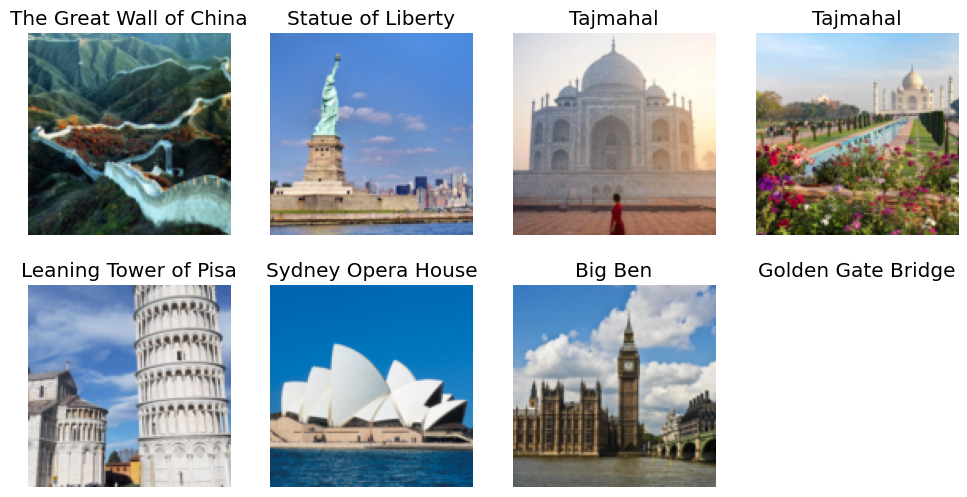

In [ ]:
dls.train.show_batch(max_n = 8, nrows = 2)

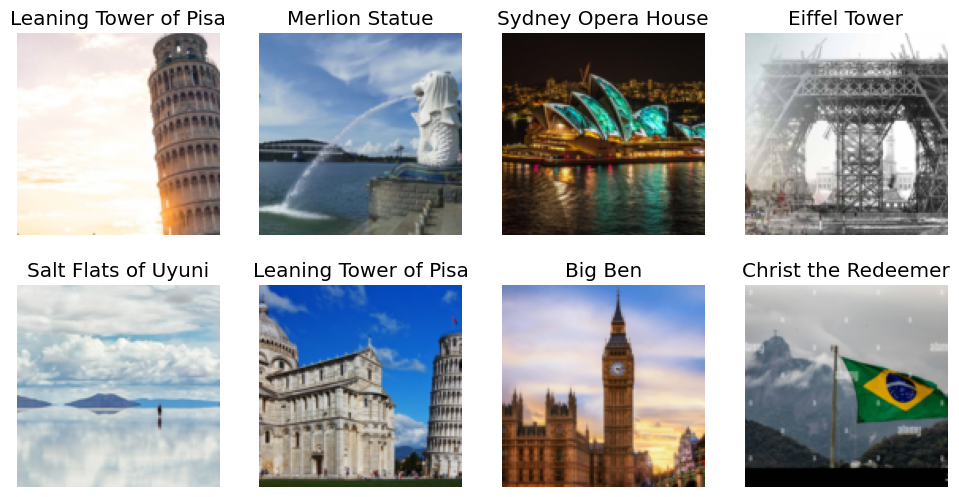

In [ ]:
dls.valid.show_batch(max_n = 8, nrows = 2)

# **Data Augmentation**

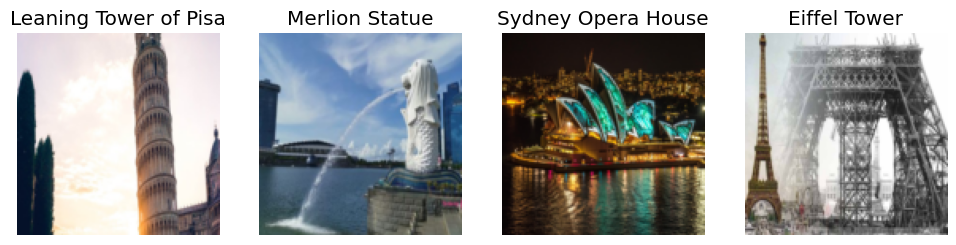

In [ ]:
dblock = dblock.new(item_tfms = RandomResizedCrop(128, min_scale = 0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n = 4, nrows = 1)

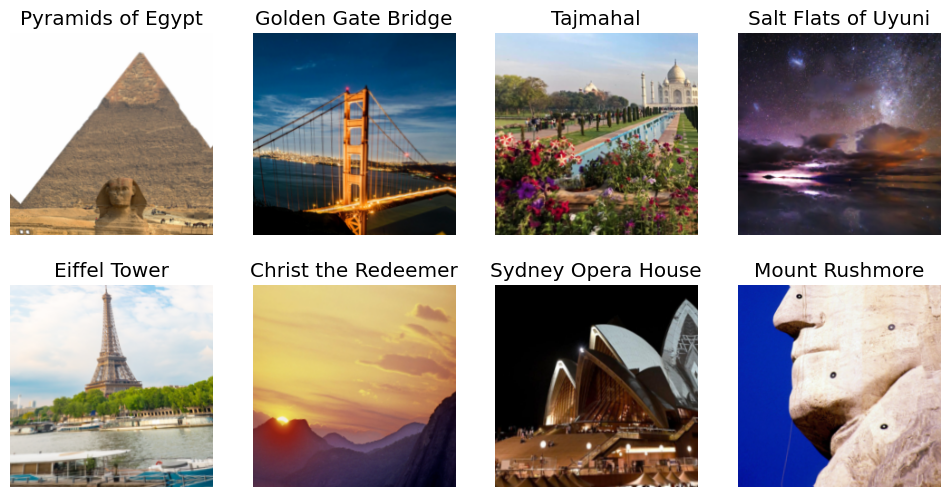

In [ ]:
dblock = dblock.new(item_tfms = RandomResizedCrop(224, min_scale = 0.5), batch_tfms = aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n = 8, nrows = 2)

In [ ]:
torch.save(dls, "/content/drive/MyDrive/landmark_dls.pkl")

# **Model Training and Data Cleaning**

In [ ]:
model = vision_learner(dls, resnet34, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 155MB/s]


In [ ]:
model.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.923884,0.351865,0.124031,0.875969,16:36


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.436044,0.217406,0.050388,0.949612,22:59
1,0.286564,0.208363,0.054264,0.945736,22:56
2,0.191935,0.181170,0.046512,0.953488,23:04


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in by

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.436044,0.217406,0.050388,0.949612,22:59
1,0.286564,0.208363,0.054264,0.945736,22:56
2,0.191935,0.181170,0.046512,0.953488,23:04
3,0.127828,0.175404,0.046512,0.953488,22:45
4,0.087307,0.163267,0.038760,0.961240,22:23


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
model.save("/content/drive/MyDrive/landmark_export.pkl")

Path('/content/drive/MyDrive/landmark_export.pkl.pth')

In [ ]:
model.load("/content/drive/MyDrive/landmark_export.pkl")

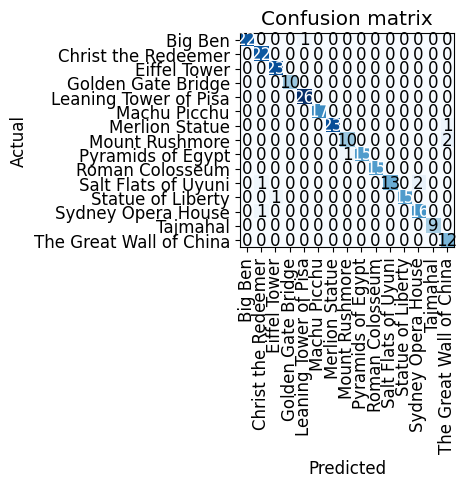

In [ ]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

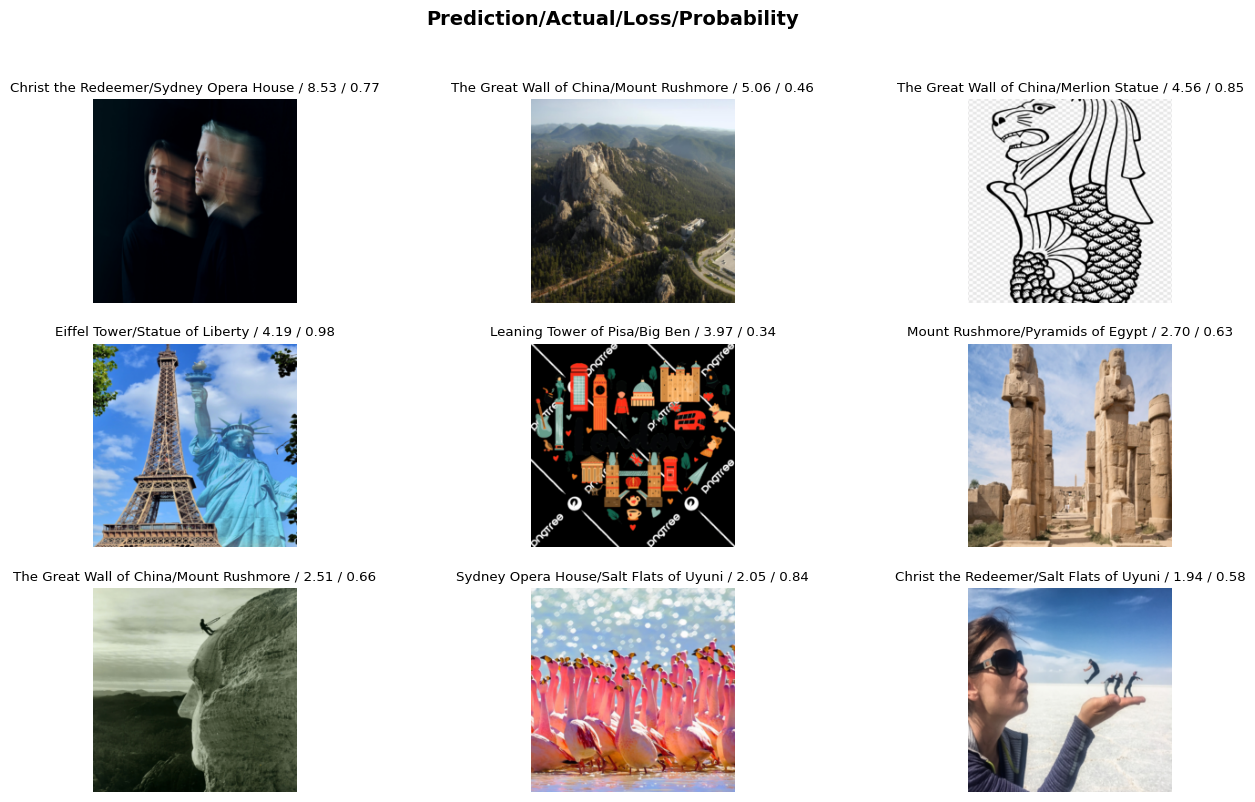

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size = 8)
interp.plot_top_losses(9, nrows = 3, figsize = (16,9))
plt.show()

# **Exporting Model for Inference**

In [ ]:
model.export("/content/drive/MyDrive/landmark_export.pkl")